In [3]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


On import les données.

In [4]:
data_olist_final = pd.read_csv('df2.csv')

In [5]:
data_olist_final

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,price
0,SP,credit_card,Home,129.90,3.0,3,8.0,141.90,5.0,12.00,60.0,236.0,1.0,129.90
1,SP,credit_card,Health_Beauty,18.90,0.0,3,1.0,27.19,4.0,8.29,56.0,635.0,1.0,18.90
2,SC,credit_card,Office_Supplies,69.00,1.0,0,8.0,86.22,3.0,17.22,49.0,177.0,3.0,69.00
3,PA,credit_card,Technology,25.99,1.0,0,4.0,43.62,4.0,17.63,43.0,1741.0,5.0,25.99
4,SP,credit_card,Technology,180.00,4.0,3,6.0,196.89,5.0,16.89,58.0,794.0,3.0,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93391,PE,credit_card,Health_Beauty,1570.00,31.0,0,10.0,4134.84,5.0,248.71,54.0,478.5,1.0,785.00
93392,BA,credit_card,Baby,64.89,1.0,3,1.0,84.58,4.0,19.69,37.0,506.0,2.0,64.89
93393,MT,credit_card,Automotive,89.90,2.0,0,1.0,112.46,5.0,22.56,57.0,716.0,5.0,89.90
93394,ES,credit_card,Fashion_Accessories,115.00,2.0,3,5.0,133.69,5.0,18.69,35.0,591.0,3.0,115.00


### VIRE LE PRICE colineaire au montant , vire le prix totale aussi (juste pour la modelisation ) VIRE product name lenght , l'agorithme peux pas faire de logique dessus , description lenght aussi 
### ça devrait un peu améliorer

Faire un sample du dataset 

Faire une pca 

Faire un score silhouette


Créer une variable cluster , group by par cluster puis faire une analyse marketting (Voir les radar propres)

D'abord onehot encode , puis cluster , rajouter cluster , puis pca pour réduire données

liées le cumul aux éboulis des valeurs propres

Utiliser la PCA pour orthogonalisés les données (pca devient une etape de preprocessing PCA (n_components avec un nombre entre 0 et 1 pour avoir le pourcentage de variance exprimé))

In [6]:
data_olist_final_sample = data_olist_final.sample(frac=0.3, random_state=42)


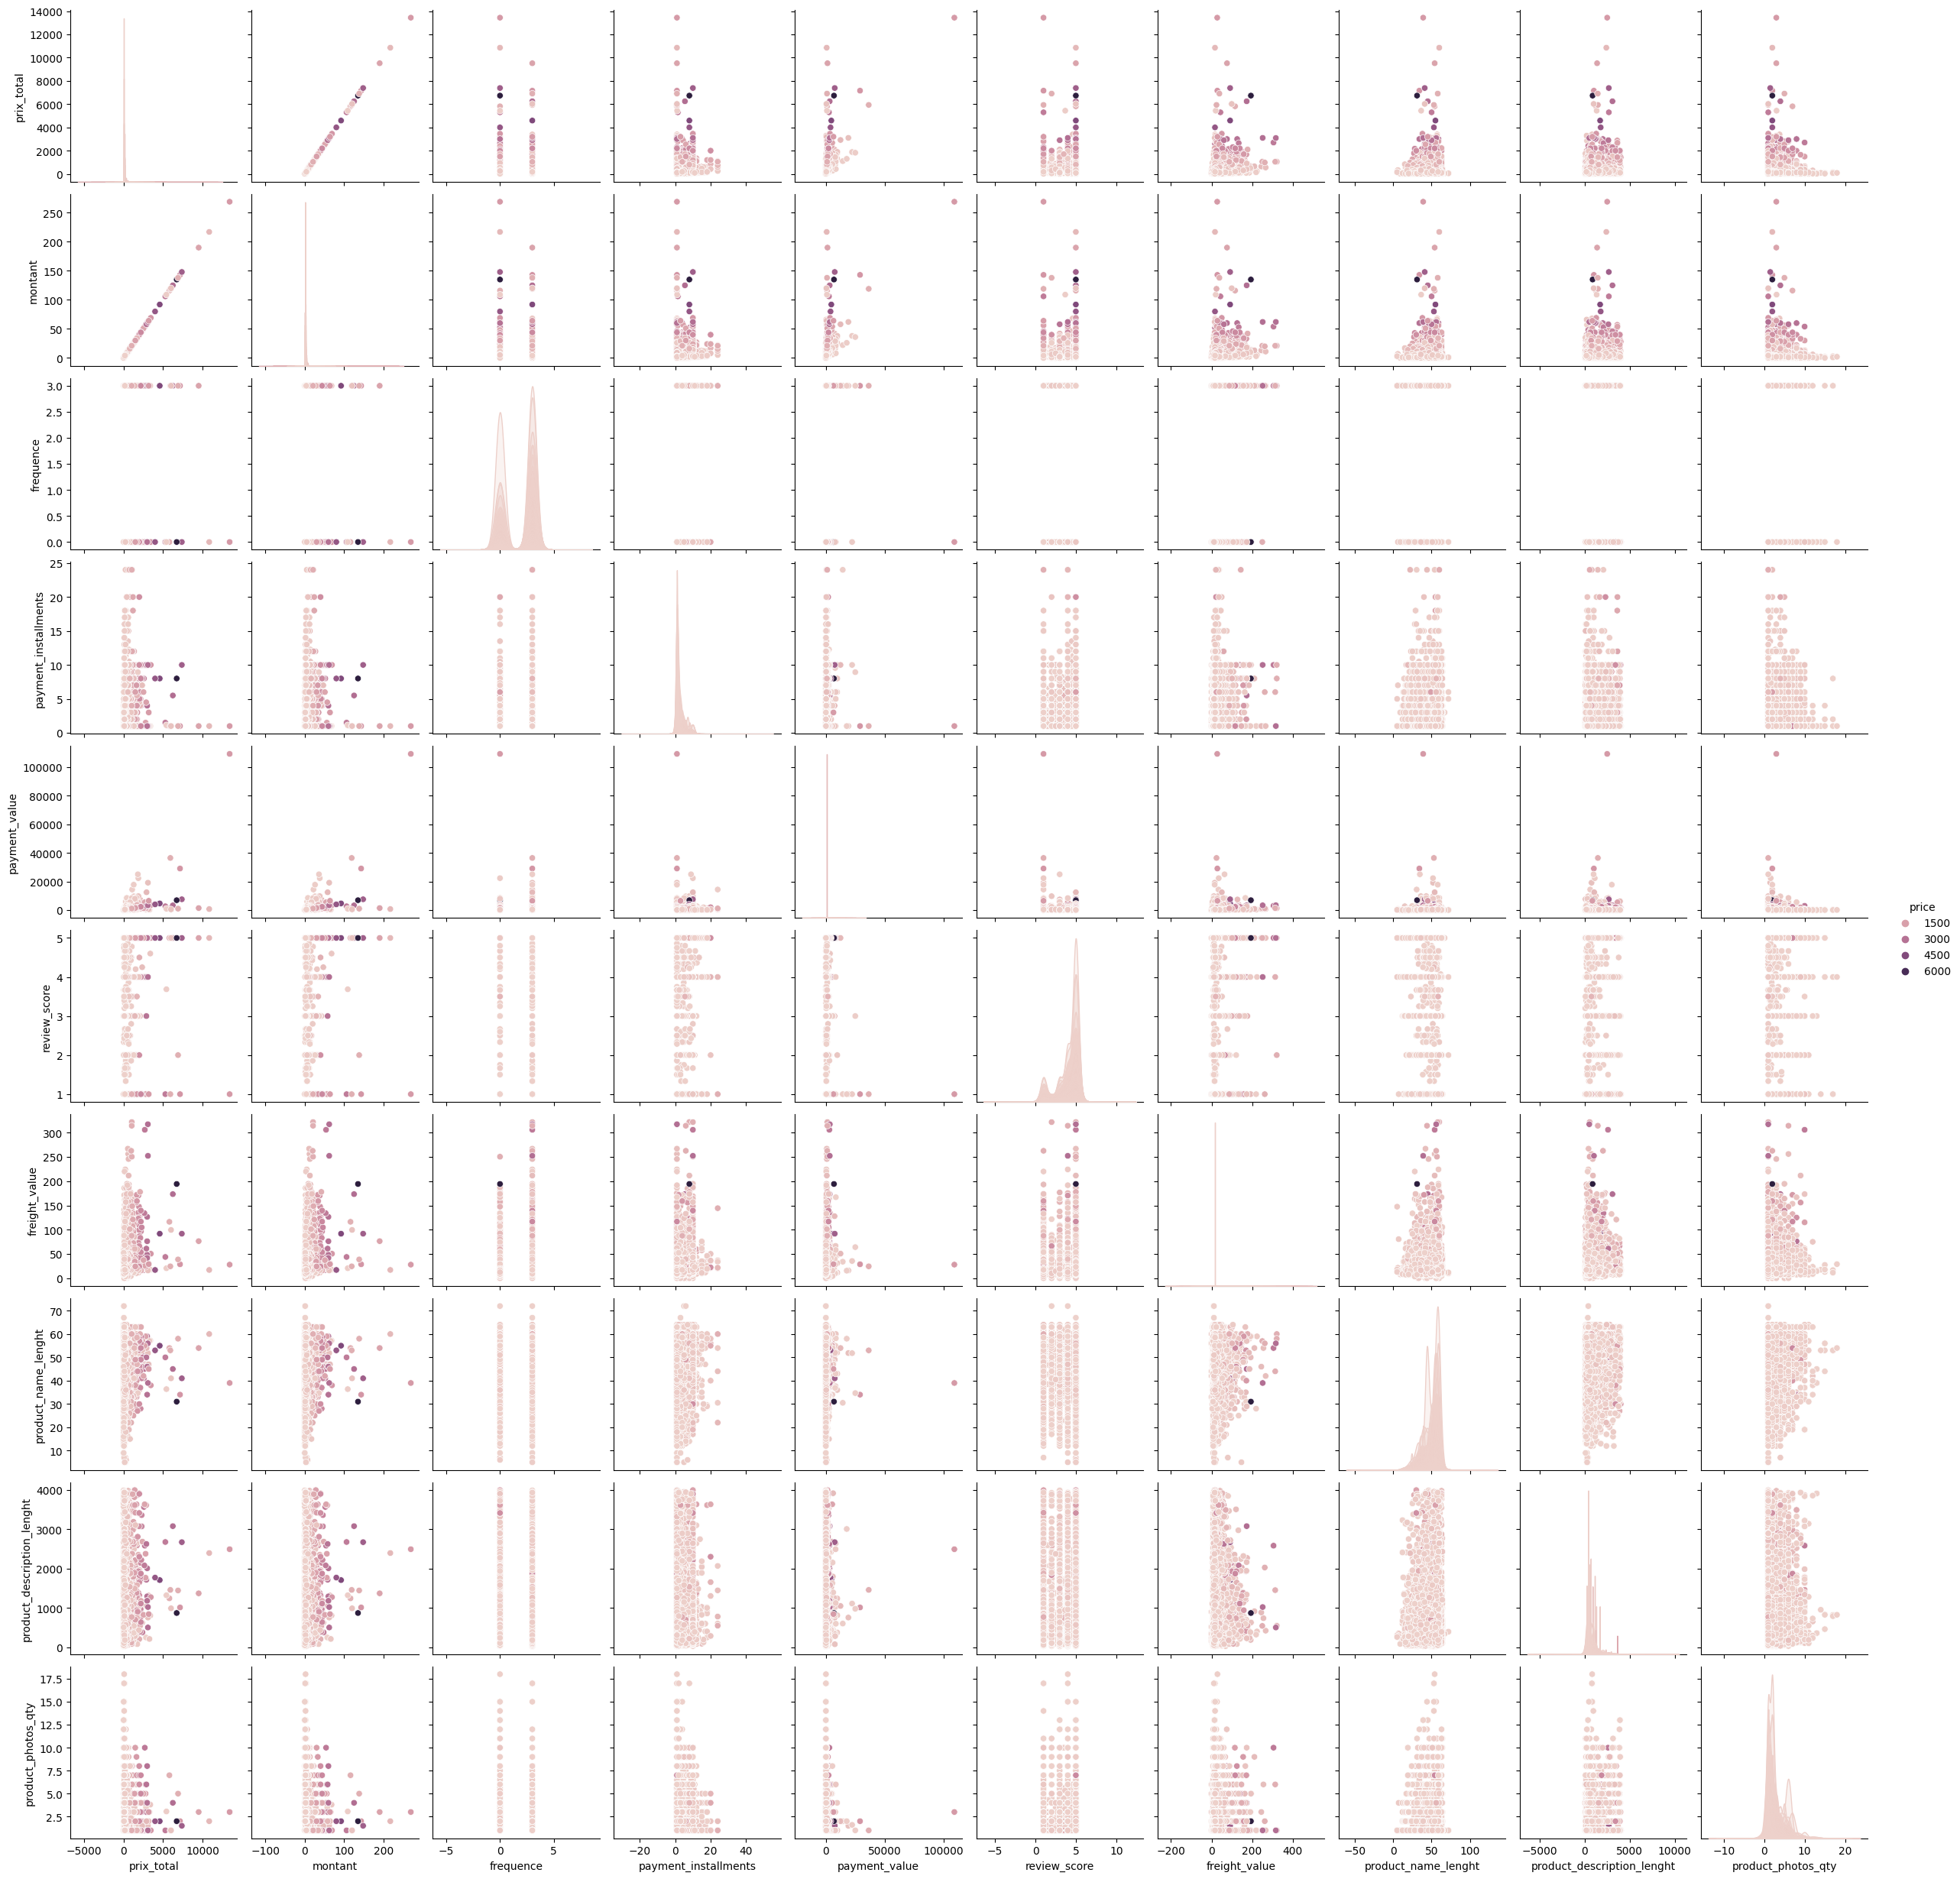

In [7]:
import seaborn as sns
sns.pairplot(data=data_olist_final_sample,hue="price")

Standardiser les valeurs selon un min max scaler

Important faire un ONE hot encoder 

Revoir le standard scaler

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Séparer les variables numériques et catégoriques
numeric_cols = data_olist_final_sample.select_dtypes(include=[np.number]).columns
categorical_cols = data_olist_final_sample.select_dtypes(include=[object]).columns

# Encoder les variables catégoriques avec OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(data_olist_final_sample[categorical_cols])
onehot_encoded_columns = [f'{col}_{value}' for col, categories in zip(categorical_cols, onehot_encoder.categories_) for value in categories]
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoded_columns, index=data_olist_final_sample.index)

# Normaliser les variables numériques
data_olist_final_sample[numeric_cols] = preprocessing.StandardScaler().fit_transform(data_olist_final_sample[numeric_cols])

# Combiner les variables numériques et catégoriques encodées en une seule dataframe
data_olist_final_sample_encoded = pd.concat([data_olist_final_sample[numeric_cols], onehot_encoded_df], axis=1)



/home/yanis/miniconda3/envs/segmentation_client/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


NameError: name 'preprocessing' is not defined

Faire l'initialisation du kprototypes 

PCA

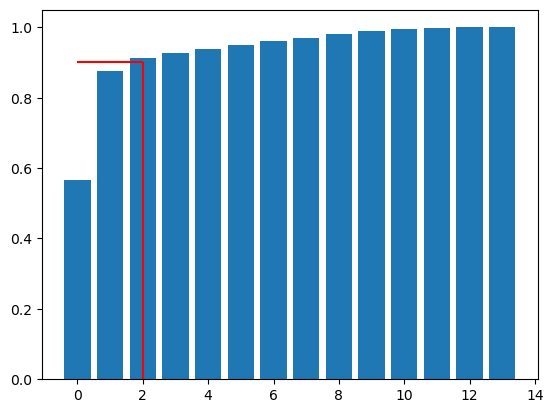

In [ ]:
from sklearn.decomposition import PCA
X = data_olist_final_sample
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)

import matplotlib.pyplot as plt
plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

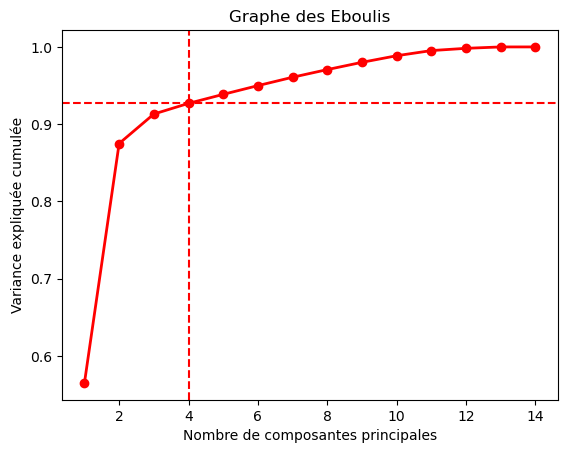

In [ ]:

# Sélectionnez les colonnes qui contiennent les features pour le clustering
X = data_olist_final_sample
# Instancier l'objet PCA avec toutes les composantes principales
pca = PCA()

# Adapter le modèle PCA aux données
pca.fit(X)

# Calculer la variance expliquée par chaque composante
variance_ratio = pca.explained_variance_ratio_

# Calculer la somme cumulée des variances expliquées
cumulative_variances = np.cumsum(variance_ratio)

# Afficher le graphe des Eboulis
plt.plot(np.arange(1, len(variance_ratio)+1), cumulative_variances, 'ro-', linewidth=2)
plt.title('Graphe des Eboulis')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')

# Ajouter des lignes verticales pour représenter les points d'inflexion de la courbe
diff_cumulative_variances = np.diff(cumulative_variances)
change_in_cumulative_variances = np.diff(diff_cumulative_variances)
optimal_components = np.argmax(change_in_cumulative_variances) + 1
plt.axvline(x=optimal_components, color='r', linestyle='--')
plt.axhline(y=cumulative_variances[optimal_components-1], color='r', linestyle='--')

plt.show()

In [ ]:
# Appliquer une PCA à X
pca = PCA()
pca.fit(X)

# Obtenir les composantes principales et les variances associées
components = pca.components_
explained_variances = pca.explained_variance_


# Projeter X dans l'espace PCA
X_transformed = pca.transform(X)

# Récupérer les données d'origine à partir des données transformées
X_recovered = np.dot(X_transformed, components) + pca.mean_

# Afficher les résultats
print("Données d'origine :")
print(X)
print("Données transformées :")
print(X_transformed)
print("Données récupérées :")
print(X_recovered)

Données d'origine :
       customer_state  payment_type  product_category_name_english  \
82976              10             1                             11   
63159              25             0                              2   
33664              17             1                              2   
11888               4             3                             11   
54242              17             0                             11   
...               ...           ...                            ...   
1727               25             0                             10   
66181              22             0                             11   
86715               4             0                             11   
71030              25             1                             15   
50095              18             1                             11   

       prix_total   montant  frequence  payment_installments  payment_value  \
82976    1.323016  1.271872   0.650223              1.914723

<AxesSubplot: >

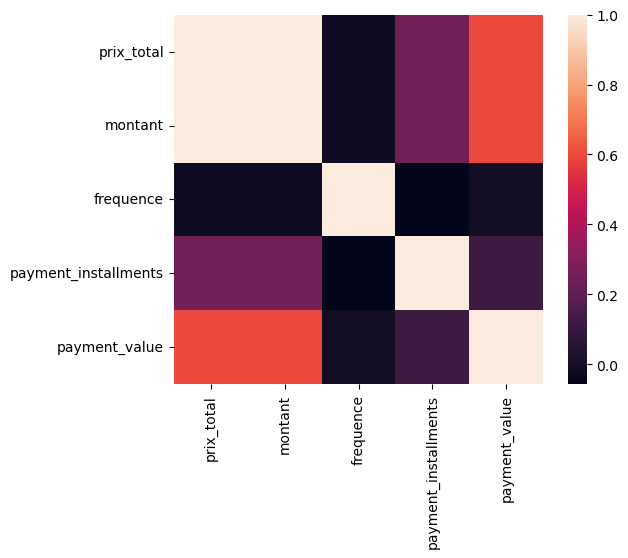

In [ ]:
import seaborn as sns
data_corr =data_olist_final_sample[['prix_total', 'montant', 'frequence', 'payment_installments', 'payment_value']]
cor = data_corr.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map


/home/simplon/miniconda3/envs/k_means/lib/python3.11/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


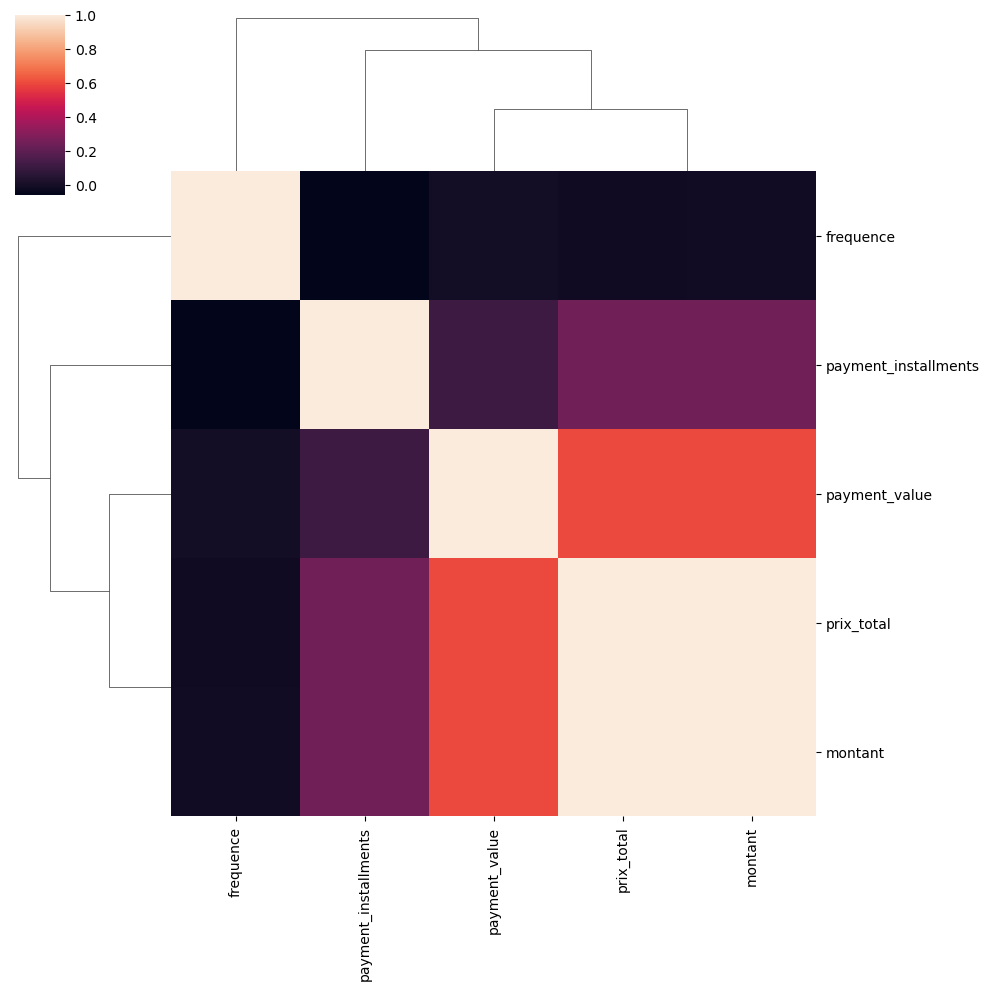

In [ ]:
data_corr =data_olist_final_sample[['prix_total', 'montant', 'frequence', 'payment_installments', 'payment_value']]
cor = data_corr.corr() #Calculate the correlation of the above variables
sns.clustermap(cor, square = True) #Plot the correlation as heat map

Comment trouver les trois features les plus importantes

Cercle des correlations

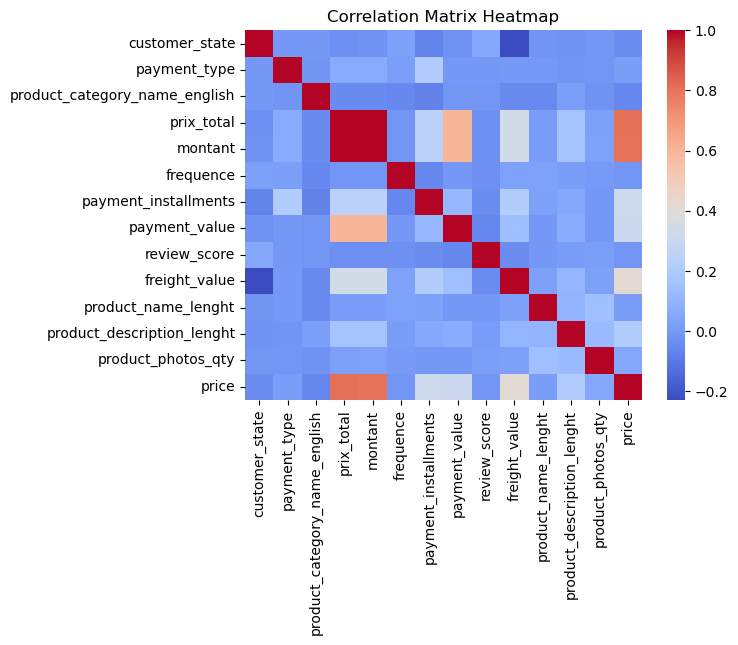

In [ ]:
corr_matrix = data_olist_final_sample.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
data_olist_final_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28019 entries, 82976 to 50095
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_state                 28019 non-null  int64  
 1   payment_type                   28019 non-null  int64  
 2   product_category_name_english  28019 non-null  int64  
 3   prix_total                     28019 non-null  float64
 4   montant                        28019 non-null  float64
 5   frequence                      28019 non-null  float64
 6   payment_installments           28019 non-null  float64
 7   payment_value                  28019 non-null  float64
 8   review_score                   28019 non-null  float64
 9   freight_value                  28019 non-null  float64
 10  product_name_lenght            28019 non-null  float64
 11  product_description_lenght     28019 non-null  float64
 12  product_photos_qty             28019 non-n

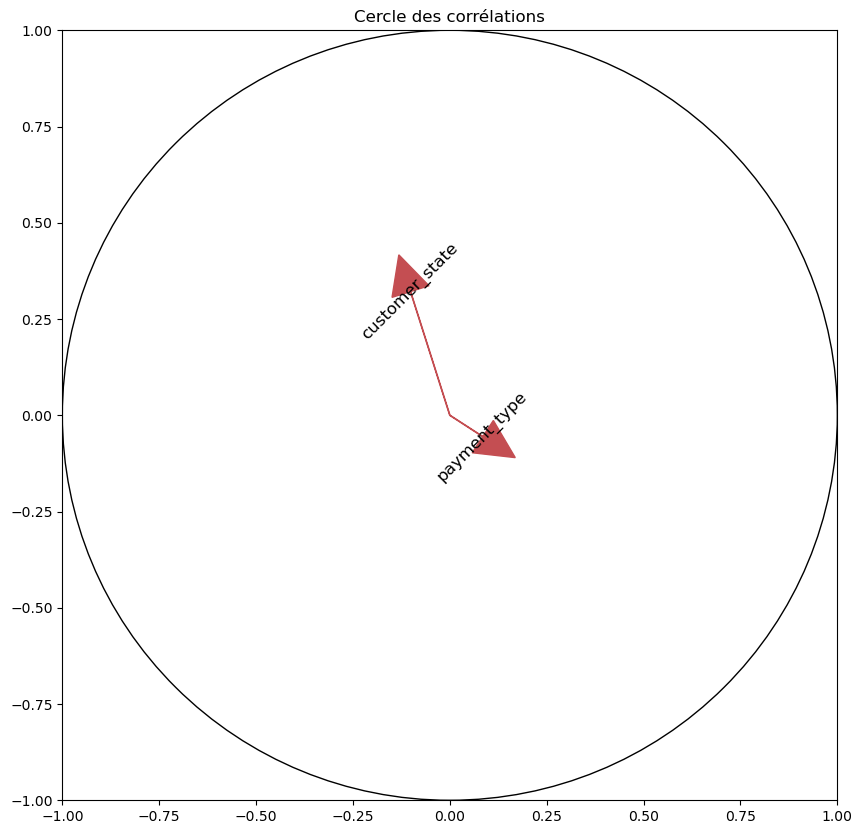

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

# Importation des données
data = data_olist_final_sample
# Standardiser les données
data_scaled = StandardScaler().fit_transform(data)

# Réaliser l'ACP
pca = PCA(n_components=2)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Tracer le cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(style='white')

# Ajouter un cercle de rayon 1
circle = plt.Circle((0, 0), radius=1, fill=False, edgecolor='black', linewidth=1)
ax.add_artist(circle)

for i in range(loadings.shape[1]):
    ax.annotate(data.columns[i], (loadings[i,0], loadings[i,1]), ha='center', va='center', fontsize=12, color='black', rotation=45)
    ax.arrow(0, 0, loadings[i,0], loadings[i,1], head_width=0.1, head_length=0.1, fc='r', ec='r')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Cercle des corrélations")
plt.show()

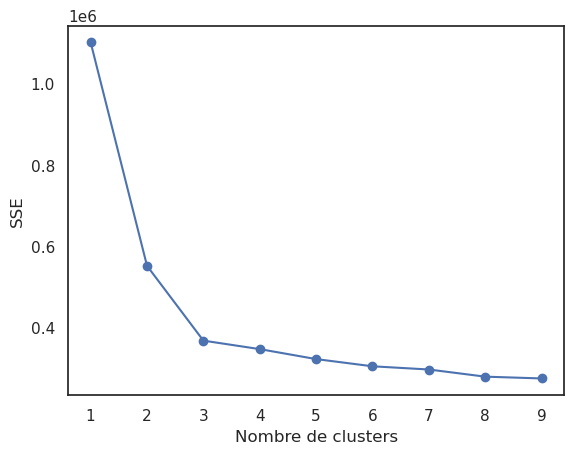

In [ ]:
# Sélectionnez les colonnes qui contiennent les features pour le clustering
X = data_olist_final_sample



# Exécution de l'algorithme k-prototypes pour différents nombres de clusters
SSE = []
for cluster in range(1, 10):
    kproto = KPrototypes(n_clusters=cluster, init='Cao', n_init=1, verbose=False)
    categorical = [0] # colonne des dates de livraison
    clusters = kproto.fit_predict(X, categorical=categorical)
    SSE.append(kproto.cost_)
    
# Tracé de la somme des distances intra-cluster pour différents nombres de clusters
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()

Knee Locator

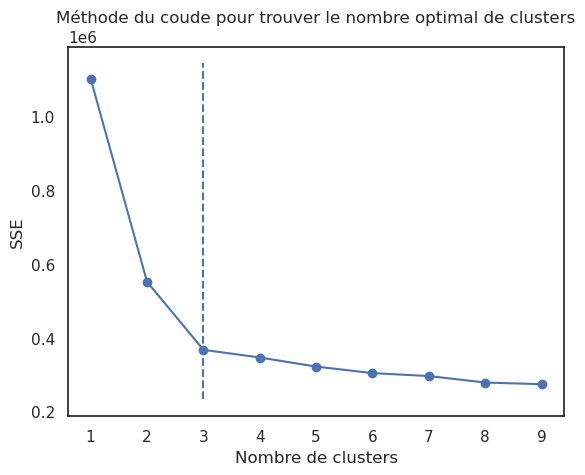

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 10), SSE, curve='convex', direction='decreasing')
k_optimal = kneedle.elbow

# Tracé de la somme des distances intra-cluster pour différents nombres de clusters
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.vlines(k_optimal, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [ ]:


# Sélectionnez les colonnes qui contiennent les features pour le clustering
X = data_olist_final_sample

# Appliquer l'algorithme k-prototypes
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=1, verbose=False)
categorical = [0] # colonne des dates de livraison
clusters = kproto.fit_predict(X, categorical=categorical)

# Afficher les résultats
print("Clusters:", clusters)

Clusters: [1 2 2 ... 1 0 1]


en deux dimensions

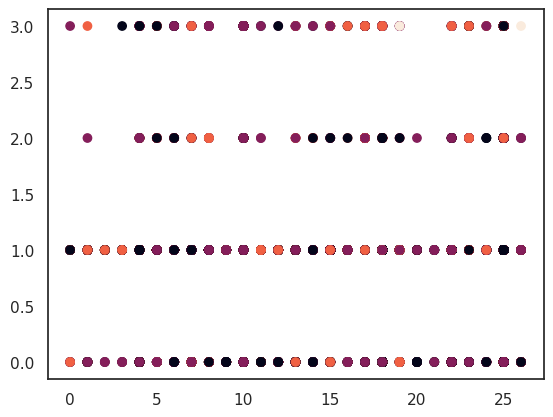

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters)
plt.show()

En 4 dimensions

/home/simplon/miniconda3/envs/k_means/lib/python3.11/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


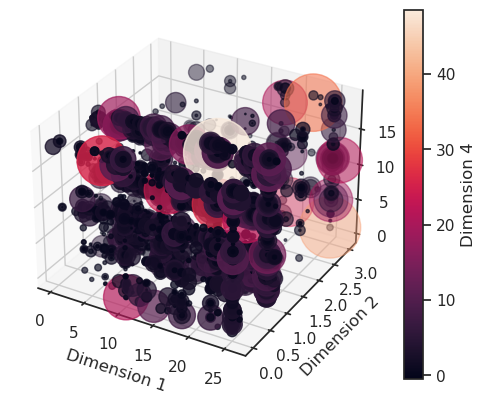

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1],X.iloc[:, 2],c= X.iloc[:, 3], s=50*X.iloc[:, 3])

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Dimension 4')
plt.show()

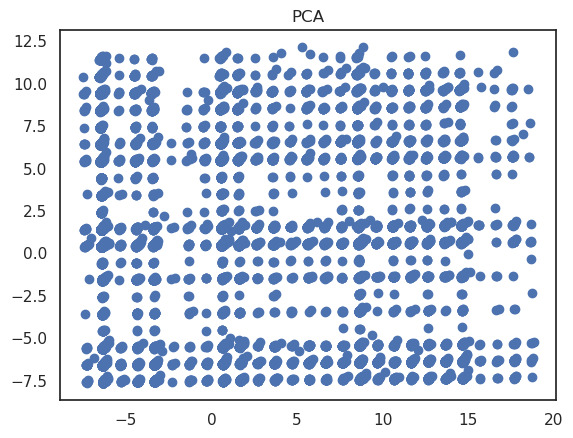

In [ ]:
# Effectuer une PCA sur les données
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

# Tracer les données dans les deux premières composantes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA')
plt.show()


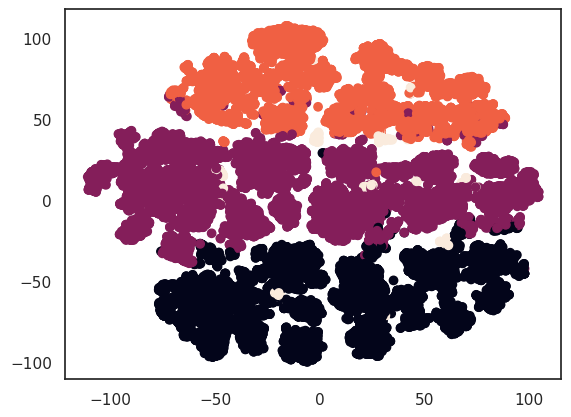

In [ ]:
from sklearn.manifold import TSNE
# On choisit 2 dimensions on s'inspirant de la PCA
tsne_components = 2

# Initialiser le modèle t-SNE
tsne_model = TSNE(n_components=tsne_components, random_state=42)

# Transformer les données en utilisant le modèle t-SNE
X_tsne = tsne_model.fit_transform(X)

# Visualiser les données réduites
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters)
plt.show()

Methode de la silhouette

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6897, ncost: 175536.12433261782
Run: 1, iteration: 2/100, moves: 2513, ncost: 174152.40369304735
Run: 1, iteration: 3/100, moves: 1168, ncost: 173786.14962124947
Run: 1, iteration: 4/100, moves: 866, ncost: 173277.89857207032
Run: 1, iteration: 5/100, moves: 970, ncost: 172614.86542294172
Run: 1, iteration: 6/100, moves: 809, ncost: 172252.08657053002
Run: 1, iteration: 7/100, moves: 572, ncost: 172104.8815252057
Run: 1, iteration: 8/100, moves: 407, ncost: 172021.76428015373
Run: 1, iteration: 9/100, moves: 337, ncost: 171976.90975062136
Run: 1, iteration: 10/100, moves: 220, ncost: 171956.08476109302
Run: 1, iteration: 11/100, moves: 225, ncost: 171917.52676166515
Run: 1, iteration: 12/100, moves: 207, ncost: 171892.30500320066
Run: 1, iteration: 13/100, moves: 117, ncost: 171886.70930217858
Run: 1

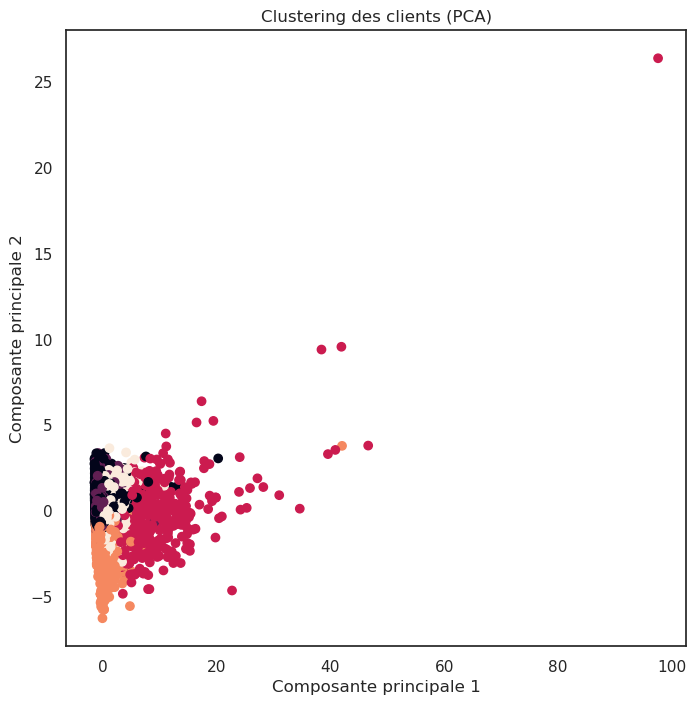

Text(0, 0.5, 't-SNE 2')

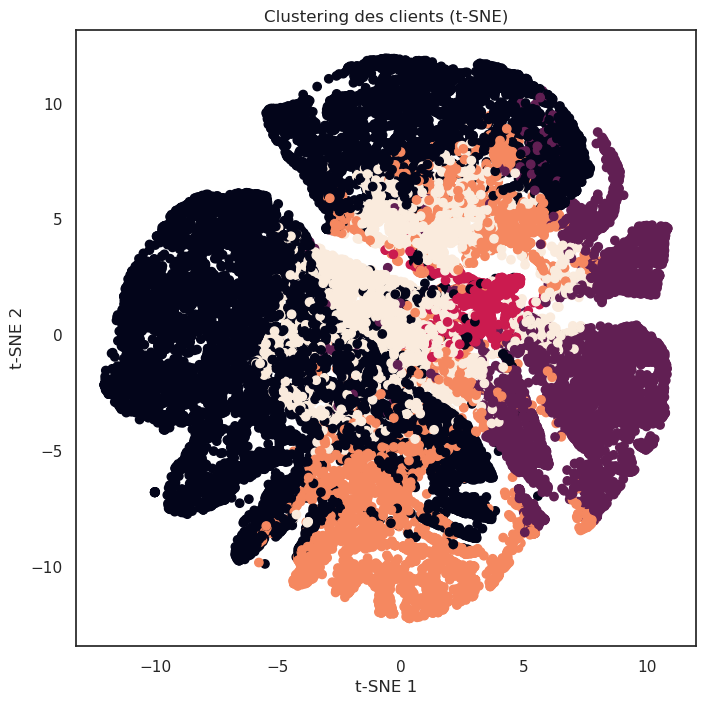

In [ ]:
# Convertir les colonnes catégoriques en entiers
cat_cols = ['customer_state', 'payment_type', 'product_category_name_english']
for col in cat_cols:
    data_olist_final_sample[col] = pd.factorize(data_olist_final_sample[col])[0]

# Sélectionner les colonnes numériques pour le clustering
numerical_cols = ['prix_total', 'montant', 'frequence', 'payment_installments',
                  'payment_value', 'review_score', 'freight_value', 'product_name_lenght',
                  'product_description_lenght', 'product_photos_qty', 'price']

# Sélectionner les colonnes catégoriques pour le clustering
categorical_cols = [data_olist_final_sample.columns.get_loc(col) for col in cat_cols]

# Effectuer le clustering avec k-prototypes
kproto = KPrototypes(n_clusters=5, init='Cao', n_init=5, verbose=2)
clusters = kproto.fit_predict(data_olist_final_sample[numerical_cols], categorical=categorical_cols)

# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_olist_final_sample[numerical_cols])

# Réduire la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(data_olist_final_sample[numerical_cols])

# Afficher les résultats avec PCA
plt.figure(figsize=(8, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
plt.title("Clustering des clients (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

# Afficher les résultats avec t-SNE
plt.figure(figsize=(8, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters)
plt.title("Clustering des clients (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")


Detection des anomalies

[-1  1  1 ...  1  1  1]


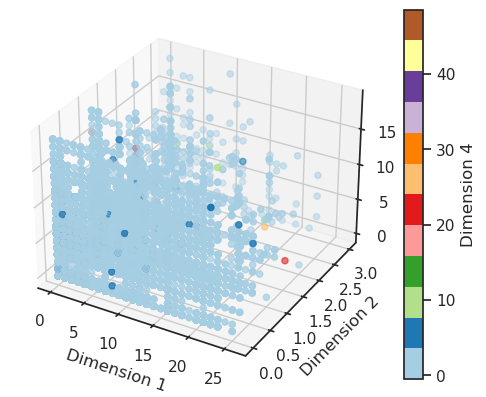

In [ ]:
from sklearn.ensemble import IsolationForest

# Instancier un modèle Isolation Forest
clf = IsolationForest(random_state=0)

# Entraîner le modèle sur les données
clf.fit(X)

# Prédire les anomalies
y_pred = clf.predict(X)

# Afficher les prédictions
print(y_pred)

# Créer un graphique de dispersion en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=X.iloc[:, 3], cmap='Paired')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Dimension 4')
plt.show()

On test le clustering hierarchique avec AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X = data_olist_final_sample

# Appliquer le clustering hiérarchique avec la fonction AgglomerativeClustering de scikit-learn
clustering = AgglomerativeClustering(n_clusters=4)
clustering.fit(X)



AgglomerativeClustering(n_clusters=4)

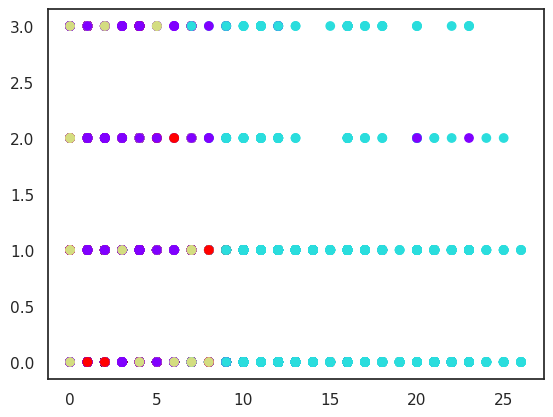

In [ ]:
# Afficher les résultats
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clustering.labels_, cmap='rainbow')
plt.show()

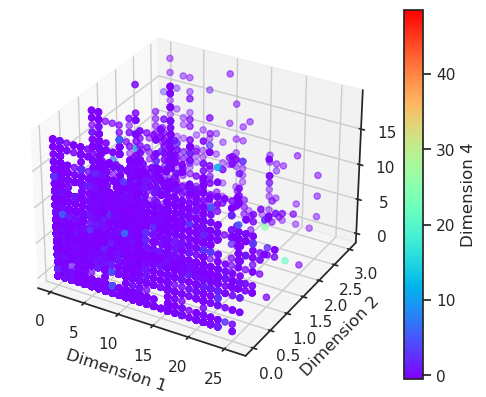

In [ ]:
# Créer un graphique de dispersion en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=X.iloc[:, 3], cmap='rainbow')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Dimension 4')
plt.show()

On essaye le spectral clustering 

In [ ]:
from sklearn.cluster import SpectralClustering


X = data_olist_final_sample


# Appliquer le clustering spectral avec la fonction SpectralClustering de scikit-learn
clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
clustering.fit(X)


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

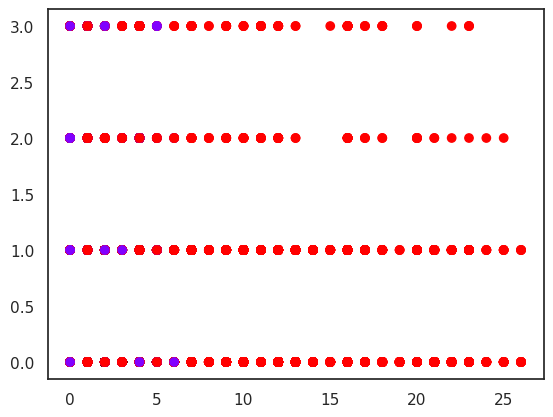

In [ ]:
# Afficher les résultats
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clustering.labels_, cmap='rainbow')
plt.show()

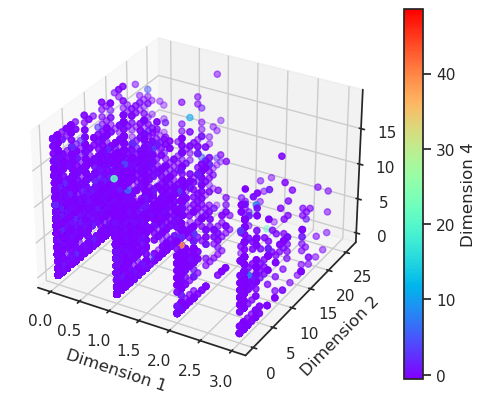

In [ ]:
# Créer un graphique de dispersion en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X.iloc[:, 1], X.iloc[:, 0], X.iloc[:, 2], c=X.iloc[:, 3], cmap='rainbow')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Dimension 4')
plt.show()

On va enlever des colonnes 
### VIRE LE PRICE colineaire au montant , vire le prix totale aussi (juste pour la modelisation ) VIRE product name lenght , l'agorithme peux pas faire de logique dessus , description lenght aussi 
### ça devrait un peu améliorer